# Student name: Akshata Bheemasamudra Mallikarjunappa

# Student ID: 23164204

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

# Task 1a

These functions are provided to assist you in Task 1a

In [ ]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [ ]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

Please add cells according to your own requirements.

In [ ]:
training_data = pd.read_csv('/content/Et2_Classification_TrainingData.csv', header = None)
testing_data = pd.read_csv('/content/Et2_Classification_TestData.csv', header = None)

train_data = training_data.to_numpy()
test_data = testing_data.to_numpy()

In [82]:
train_data

array([[ 0.65486195,  0.3268623 ,  1.        ],
       [ 0.91047619, -0.07688062, -1.        ],
       [-0.00169938, -0.82382899,  1.        ],
       [ 0.44597714, -0.67003061,  1.        ],
       [ 0.45844887,  0.57629427,  1.        ],
       [-0.69013405, -0.43194753,  1.        ],
       [-0.28639443, -0.60827707,  1.        ],
       [-0.79717293,  0.20874779,  1.        ],
       [-0.10740871,  0.9084754 , -1.        ],
       [ 0.62665772, -0.87409505, -1.        ],
       [ 0.64475218, -0.23753688,  1.        ],
       [-0.22045305, -0.7019053 ,  1.        ],
       [ 0.63122503, -0.86337861, -1.        ],
       [-1.09010336, -0.03848841, -1.        ],
       [ 0.72025136, -0.08374249,  1.        ],
       [ 0.15493629, -1.07718376, -1.        ],
       [-0.25507899, -0.86600219, -1.        ],
       [-0.28040874,  0.75151572,  1.        ],
       [ 1.1088526 , -0.32164911, -1.        ],
       [-0.6122901 , -0.86522498, -1.        ],
       [-1.00964883, -0.05448252, -1.   

In [ ]:
X_train, y_train = train_data[:,:2], train_data[:,2]
X_test, y_test = test_data[:,:2], test_data[:,2]

In [ ]:
# Train scikit-learn’s Logistic Regression algorithm using the Et2_Classification_TrainingData.csv
# dataset provided in the repository without adding extra features to those provided.

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)

weights = np.append(log_reg.intercept_, log_reg.coef_)
db = decision_boundary(weights, -2, 2)

[[-0.0899195  -0.20308469]]
[-0.10492216]


In [ ]:
# Test the performance of your model using the Et2_Classification_TestData.csv dataset.
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)
print(f' the training accuracy is {train_score} and testing accuracy is {test_score}')

 the training accuracy is 0.4714285714285714 and testing accuracy is 0.36666666666666664


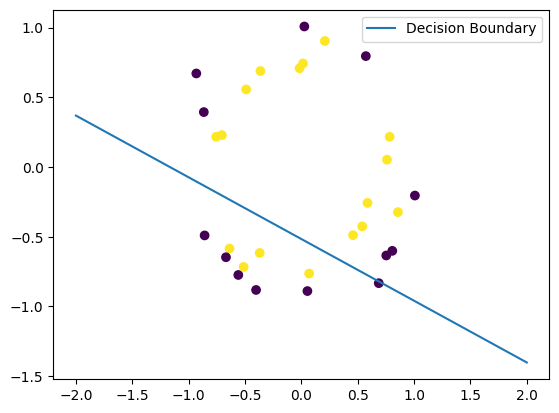

In [ ]:

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.plot([-2, 2], db, label="Decision Boundary")
plt.legend()
plt.show()

### Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).

#Ans. As seen, the data is clustered into two groups, yellow data points and purple data points. However,  as shown by the decision boundary line, these cannot be classified linearly. And so the accuracy of the model is quite low at 47% for training data and 36% for tested data. In reality, we may have dataset containing features which are linearly related and there are features with data points which are not linearly related and so, classifying these type of datasets willbe difficult resulting in poor performance of the model.

[[-0.04919703 -0.11172467]]
[-0.10403502]
 the training accuracy is 0.4857142857142857 and testing accuracy is 0.36666666666666664


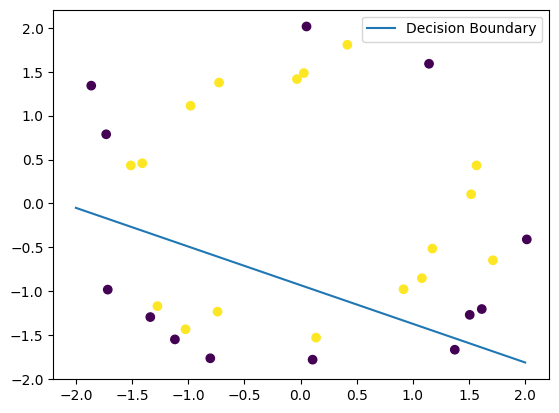

In [89]:
# Now choose suitable new features and use these to improve the classification performance.
# transformations with committing the sin of "data snooping" and note the differences.

new_training_data_features = training_data.iloc[:, :2] * 2
new_testing_data_features = testing_data.iloc[:, :2] * 2
new_training_data_target = training_data.iloc[:, 2]
new_testing_data_target = testing_data.iloc[:, 2]
new_X_train = new_training_data_features.to_numpy()
new_X_test = new_testing_data_features.to_numpy()
new_y_train = new_training_data_target.to_numpy()
new_y_test = new_testing_data_target.to_numpy()


log_reg = LogisticRegression()
log_reg.fit(new_X_train, new_y_train)

print(log_reg.coef_)
print(log_reg.intercept_)

weights = np.append(log_reg.intercept_, log_reg.coef_)
db = decision_boundary(weights, -2, 2)

# Test the performance of your model using the Et2_Classification_TestData.csv dataset.
new_train_score = log_reg.score(new_X_train, new_y_train)
new_test_score = log_reg.score(new_X_test, new_y_test)
print(f' the training accuracy is {new_train_score} and testing accuracy is {new_test_score}')

plt.scatter(new_X_test[:, 0], new_X_test[:, 1], c=new_y_test)
plt.plot([-2, 2], db, label="Decision Boundary")
plt.legend()
plt.show()

### Observe and explain (use plots where appropriate)

#Ans. Wihout data snooping, by anestimation of the features, each dimension was multiplied by 2. However this did not improve the model's performance and improved accuracy by 1.5% only on training data. We can see that the data points are still not classified linearly.

In [92]:
# Try a few different hand-crafted (i.e. no need to use functions to create the transformations)
# transformations with committing the sin of "data snooping" and note the differences.

New_X_train = (X_train[:, 0]**2 + X_train[:, 1]**2).reshape(-1, 1)
New_X_test = (X_test[:, 0]**2 + X_test[:, 1]**2).reshape(-1, 1)
New_y_train = y_train
New_y_test = y_test

In [98]:
log_reg = LogisticRegression()
log_reg.fit(New_X_train, New_y_train)

print(log_reg.coef_)
print(log_reg.intercept_)


weights = np.append(log_reg.intercept_, log_reg.coef_)
#db = decision_boundary(weights, -2, 2)

# Test the performance of your model using the Et2_Classification_TestData.csv dataset.
train_score = log_reg.score(New_X_train, New_y_train)
test_score = log_reg.score(New_X_test, New_y_test)
print(f' the training accuracy is {train_score} and testing accuracy is {test_score}')


[[-3.57173061]]
[2.89796576]
 the training accuracy is 0.9285714285714286 and testing accuracy is 0.9


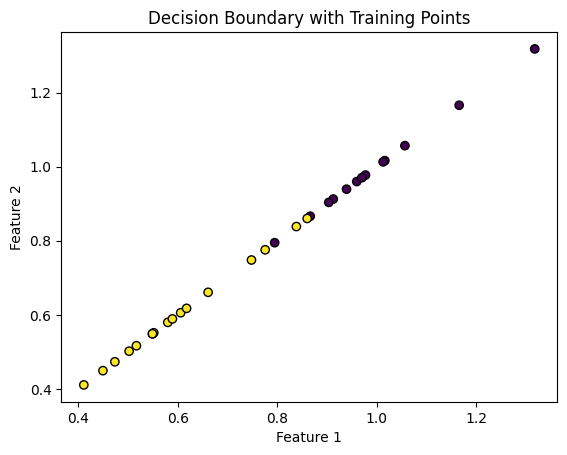

In [103]:

plt.scatter(New_X_test[:, 0], New_X_test[:, 0], c=New_y_test, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Training Points')
plt.show()

Observe and explain (use plots where appropriate) why the classification performance has improved.

###Ans. After data snooping (that is lookig into the data before creating a model t understand how the features/dimensions are inter-related, we realized that the data points are not linearly seperable and that the yellow data points are closer to the origin and the purple data points are farther from the origin). This leads us to the realization that there can be a third dimension creating a new feature space and thus creating a plane to draw a boundary rather than a linear line. However, this is not very evident in the above graph. A SVM kernel model gives a more accurate result

## Reflection

After engaging with your peers, reflect on this task and answer the following questions:

- How do the found values for Ein and Eout for the various models relate to model complexity?
#Ans. The model complexity increases with increase in overfitting which means it has captured the noise as data point to be classified, which means Eout is large. However with small Ein the model complexity decreases and it tends to underfit. But with sufficient number of Ein the VC dimension can capture the right amount of input data required.

- Explain how data transformations can lead to linear separability of a dataset.
#Ans. Data tansformations refer to changing the feature space of the data. Here, we trasnformed the data to a 3rd dimension feature space by squaring and adding the data points which implies that data points with similar output data tends to stay near the origin and the other set of data points tends to move away from the origin which helps in creating a decision boundary which implies that non-linearly separable data is now able to be classified linearly using a linear model.

- Explain how data transformations effect the complexity of your model.
#Ans. Data transformation implies creating  new features which implies that VC dimension may increase. With lesser number of features, data transformation may not affect model complexity to a great extent hosever with a huge number of features, it may lead to giving a more complex model leading to overfitting the data.

Your reflection..

# Task 1b

In [3]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [4]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [6]:
def transPoly(X, power):
    # Extend the data in X with dimensions [N,1] with powers of the feature up to 'power'
    # X=X.reshape(-1,1)
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [135]:
error_in = []
error_out = []
repeats = 100
power_range = range(low_powers, high_powers) # it is up to you to decide on a suitable range

for power in power_range:
    e_in=0
    e_out=0
    for r in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=XX) ##Choose a suitable training_size XX
        X_train_trans = ## implement your data transformation
        X_test_trans = ## implement your data transformation
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_out+= calc_error(w,X_test_trans,y_test)
    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

SyntaxError: invalid syntax (<ipython-input-135-a0216a043965>, line 11)

Please add cells according to your own requirements.

## Reflection
After engaging with your peers, reflect on this task and answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity?

Your reflection..

# Task 2

Below is an implementation of linear regression with regularization

In [9]:
# Use the provide function transPoly to obtain a weight vector of the original feature raised up to the power of 50
# Use the provided weights_reg function to perform linear regression on the data.
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

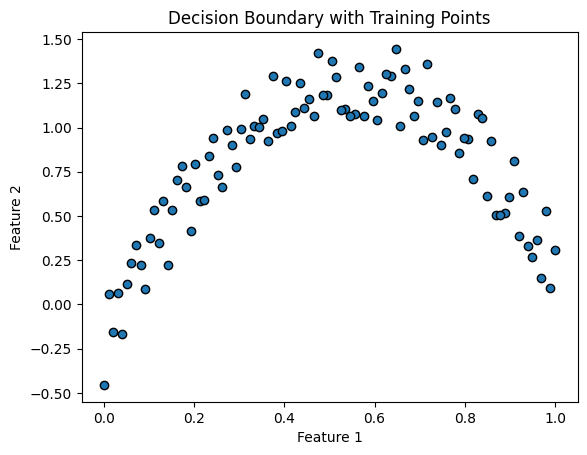

In [10]:
df = pd.read_csv("ET2_Regression_Data.csv", header = None)
X, y = np.array(df[0]), np.array(df[1])

plt.scatter(X, y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Training Points')
plt.show()

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

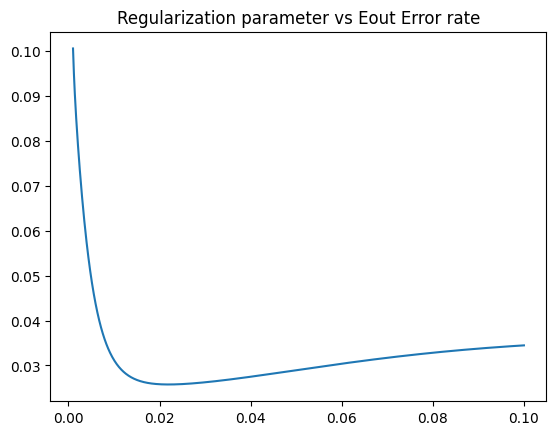

In [13]:
# Using the provided code snippet, find the optimum regularization parameter, l.
ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0.001, 0.1, 1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
for l in lambdas:
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

# A plot showing model performance vs l on the domain [0,1]
plt.plot(lambdas,eout)
plt.title('Regularization parameter vs Eout Error rate')
plt.show()

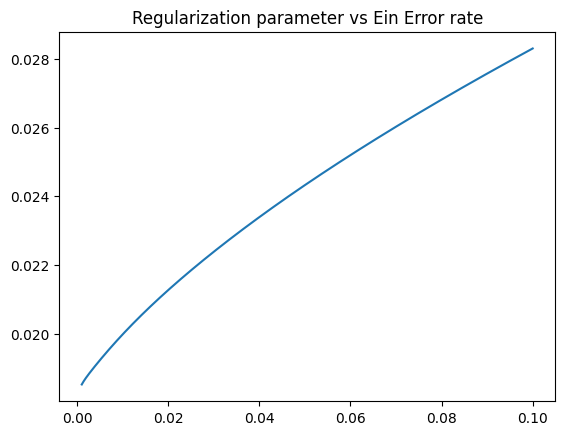

In [14]:
plt.plot(lambdas,ein)
plt.title('Regularization parameter vs Ein Error rate')
plt.show()

Please add cells according to your own requirements.

In [12]:
print(f'best lambda {lambdas[eout.index(min(eout))]}')

for l in [0, lambdas[eout.index(min(eout))]]:

    weight = weights_reg(X_train,y_train,l)

    print(f'model with lambda =  {l} and  error = { calc_error(w,X_test,y_test) }')

best lambda 0.022009009009009012
model with lambda =  0 and  error = 0.03447697083641176
model with lambda =  0.022009009009009012 and  error = 0.03447697083641176


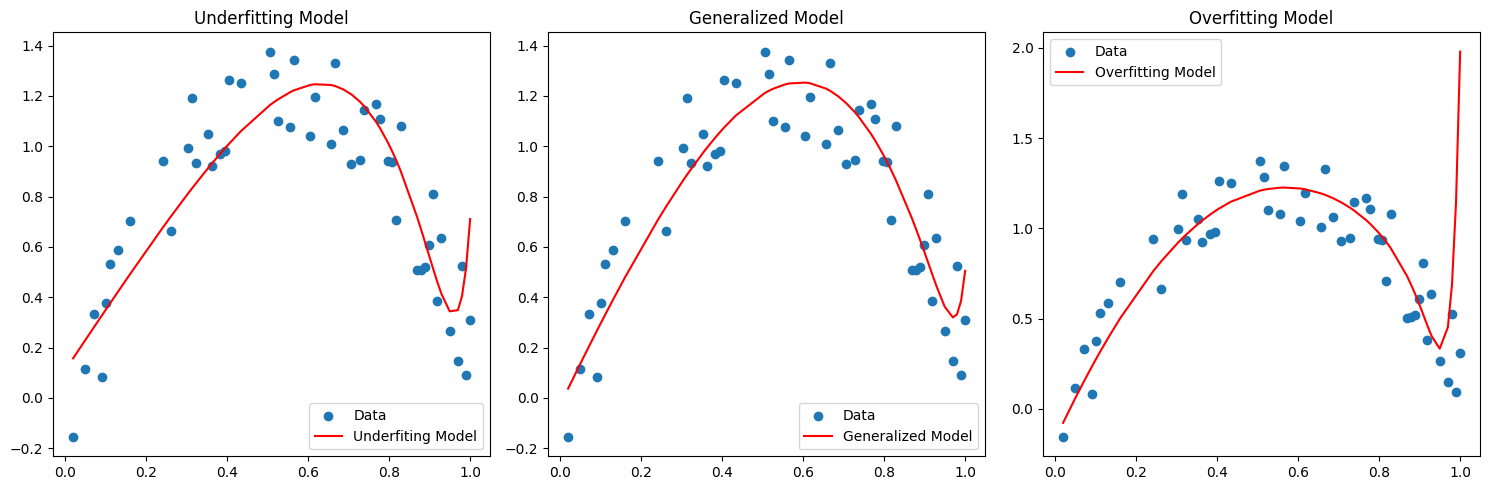

In [15]:
# A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model
fig, column = plt.subplots(1, 3, figsize=(15, 5))
column[0].scatter(X_test[:, 0], y_test, label='Data')
column[1].scatter(X_test[:, 0], y_test, label='Data')
column[2].scatter(X_test[:, 0], y_test, label='Data')

x_range = np.linspace(X_train.min(), X_train.max(), 100)

y_pred_underfit = linreg_predict(weights_reg(X_train, y_train, 0.1), X_test)
y_pred_optimal = linreg_predict(weights_reg(X_train, y_train, lambdas[eout.index(min(eout))]), X_test)
y_pred_overfit = linreg_predict(weights_reg(X_train, y_train, 0.001), X_test)

sort_indices = np.argsort(X_test[:, 0])

X_test_sorted = X_test[:, 0][sort_indices]

y_pred_optimal_sorted = y_pred_optimal[sort_indices]
y_pred_underfit_sorted = y_pred_underfit[sort_indices]
y_pred_overfit_sorted = y_pred_overfit[sort_indices]


column[0].plot(X_test_sorted, y_pred_underfit_sorted, 'r-', label='Underfiting Model')
column[0].set_title(f'Underfitting Model')
column[0].legend()
column[1].plot(X_test_sorted, y_pred_optimal_sorted, 'r-', label='Generalized Model')
column[1].set_title(f'Generalized Model')
column[1].legend()
column[2].plot(X_test_sorted, y_pred_overfit_sorted, 'r-', label='Overfitting Model')
column[2].set_title(f'Overfitting Model')
column[2].legend()


plt.tight_layout()
plt.show()

## Reflection

In your reflection, makes sure to answer the following questions:

- Interpret the information in the requested figures.
### Ans. Theabove three figures show the different model complexities w.r.t the regularization parameter lambda. The first figure shows an underfitting model which implies a small lambda isused. An optimal lambda (best lambda) in this case which is 0.23 gives the generalized model and a very large value of lambda gives an overfitting model which implies the model is trying to capture extra data points which are not necessarily needed.

- Explain the strategy chosen to decide on the optimum amount of regularisation.
### Ans. The strategy used is to loop through a range of lambda values, starting from 0.001 and ending at 0.1 with a step value of 10. The model thus gives a hypothesis at each value between 0.001 to 0.1 and the best hypothesis (minimal generalization error) is chosen as the best lambda parameter.

- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.
### Ans. This is used to balance the trade off between over-fitting and optimally fitting the training data. This helps to push the coefficients of the features to zero to ensure stability in the model and not overfit.

# Task 3

Please add cells according to your own requirements.

In [23]:
# Update the code-snippet from Task 2 to perform the same analysis using 10-fold cross-validation

ein = []
eout = []
weights = []
k_fold = KFold(n_splits=10, shuffle=True, random_state= 5)

for l in lambdas:
    weight_kfold = []
    ein_kfold = []
    eout_kfold = []

    for train, test in k_fold.split(X_trans):
        X_train, X_test, y_train, y_test = X_trans[train], X_trans[test], y[train], y[test]
        w = weights_reg(X_train, y_train, l)
        ein_kfold.append(calc_error(w, X_train, y_train))
        eout_kfold.append(calc_error(w, X_test, y_test))
        weight_kfold.append(w)


    ein.append(np.mean(ein_kfold))
    eout.append(np.mean(eout_kfold))

print(lambdas[eout.index(min(eout))])

0.004072072072072072


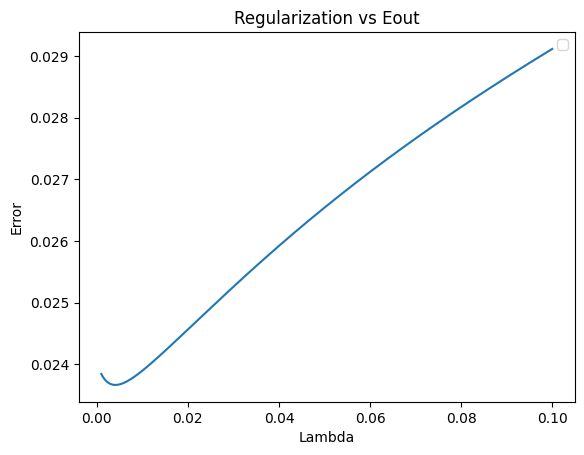

In [18]:
plt.plot(lambdas,eout)
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend()
plt.title("Regularization vs Eout")
plt.show()

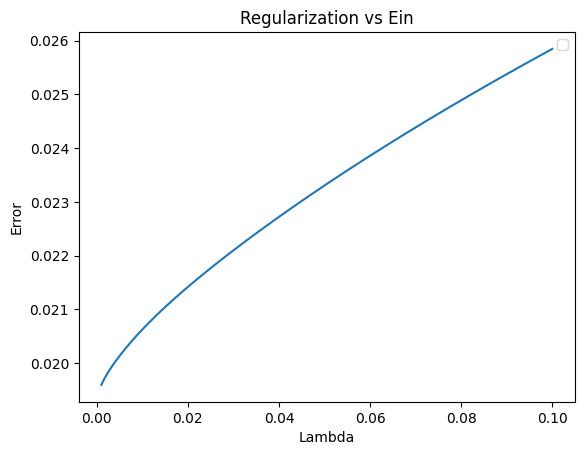

In [20]:
plt.plot(lambdas,ein)
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend()
plt.title("Regularization vs Ein")
plt.show()

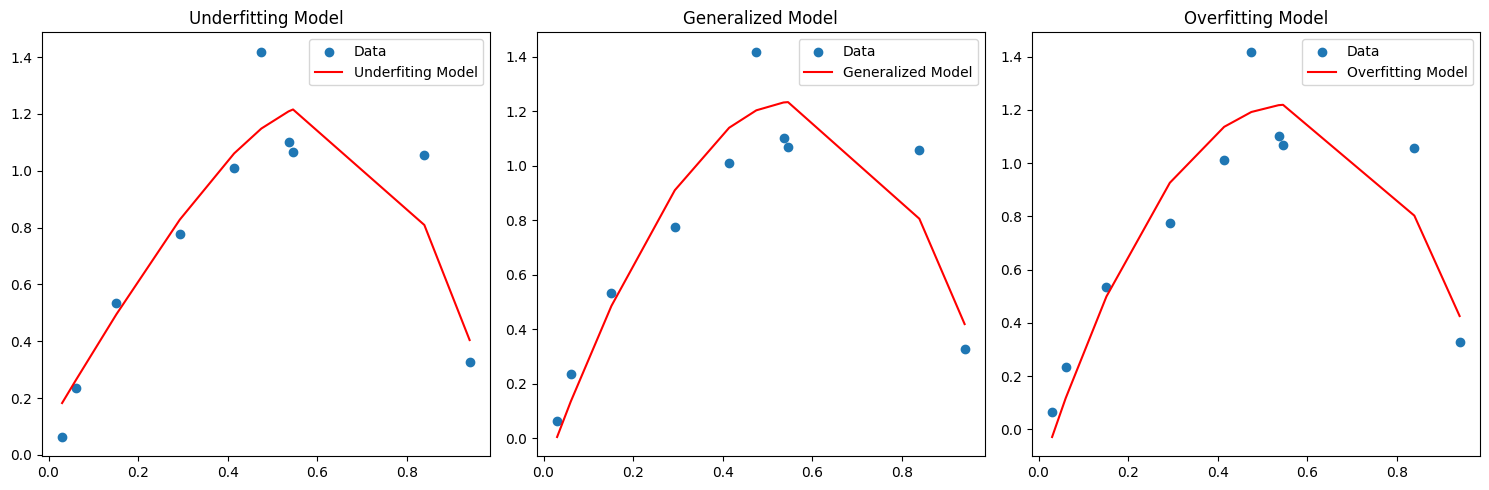

In [21]:
# A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model
fig, column = plt.subplots(1, 3, figsize=(15, 5))
column[0].scatter(X_test[:, 0], y_test, label='Data')
column[1].scatter(X_test[:, 0], y_test, label='Data')
column[2].scatter(X_test[:, 0], y_test, label='Data')

x_range = np.linspace(X_train.min(), X_train.max(), 100)

y_pred_underfit = linreg_predict(weights_reg(X_train, y_train, 0.1), X_test)
y_pred_optimal = linreg_predict(weights_reg(X_train, y_train, lambdas[eout.index(min(eout))]), X_test)
y_pred_overfit = linreg_predict(weights_reg(X_train, y_train, 0.001), X_test)

sort_indices = np.argsort(X_test[:, 0])

X_test_sorted = X_test[:, 0][sort_indices]

y_pred_optimal_sorted = y_pred_optimal[sort_indices]
y_pred_underfit_sorted = y_pred_underfit[sort_indices]
y_pred_overfit_sorted = y_pred_overfit[sort_indices]


column[0].plot(X_test_sorted, y_pred_underfit_sorted, 'r-', label='Underfiting Model')
column[0].set_title(f'Underfitting Model')
column[0].legend()
column[1].plot(X_test_sorted, y_pred_optimal_sorted, 'r-', label='Generalized Model')
column[1].set_title(f'Generalized Model')
column[1].legend()
column[2].plot(X_test_sorted, y_pred_overfit_sorted, 'r-', label='Overfitting Model')
column[2].set_title(f'Overfitting Model')
column[2].legend()


plt.tight_layout()
plt.show()

## Reflection
In your reflection, explain the procedure followed by using KFOLDS and your choice of parameters.

### Ans. Kfolds is a way to control model complexity. The cross-validation refers to the training data being split into multiple folds of training and test data. This helps us find the best probsble lambda value.

# Task 4

In [34]:
# Use scikit-learn’s RidgeCV and LassoCV to obtain the optimum
# regularisation using the same transformed data (i.e. features up to 50th order).

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.8, random_state =5)

ridge_model = RidgeCV(alphas=lambdas[1:], cv=10)
ridge_model.fit(X_train, y_train)

print(f"Eout = {ridge_model.score(X_test, y_test)}")
print("Best alpha", ridge_model.alpha_)
print("weights", ridge_model.coef_)


Eout = 0.8014575858087221
Best alpha 0.006747747747747748
weights [ 4.15718563e+00 -2.32704700e+00 -1.46148676e+00 -3.99682659e-01
  1.02369194e-01  2.31270278e-01  1.88940169e-01  9.21340330e-02
 -4.24065288e-03 -7.92791603e-02 -1.28493161e-01 -1.54353053e-01
 -1.61633542e-01 -1.55313998e-01 -1.39752994e-01 -1.18459860e-01
 -9.41221595e-02 -6.87252442e-02 -4.36899748e-02 -1.99987395e-02
  1.69960417e-03  2.10063621e-02  3.77084139e-02  5.17288156e-02
  6.30892443e-02  7.18815015e-02  7.82458927e-02  8.23548192e-02
  8.44003358e-02  8.45847408e-02  8.31135009e-02  8.01899851e-02
  7.60116057e-02  7.07670600e-02  6.46344322e-02  5.77799676e-02
  5.03573711e-02  4.25075100e-02  3.43584269e-02  2.60255876e-02
  1.76123001e-02  9.21025920e-03  9.00174707e-04 -7.24754587e-03
 -1.51720857e-02 -2.28214967e-02 -3.01519820e-02 -3.71271945e-02
 -4.37175586e-02 -4.98996228e-02]


In [28]:
lasso_model = LassoCV(alphas=lambdas[1:], cv=10, tol=0.01)
lasso_model.fit(X_train, y_train)

print(f"Eout = {lasso_model.score(X_test, y_test)}")
print(f"Best alpha {lasso_model.alpha_}")
print(f"weights {lasso_model.coef_}")

Eout = 0.8122936368725144
Best alpha 0.0010990990990990992
weights [ 3.44302512e+00 -1.42655248e+00 -1.14362646e+00 -5.45831300e-01
 -2.44174010e-01 -7.17501164e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.23320181e-03
  3.57707333e-02  3.40871563e-02  3.25020280e-02  3.10091647e-02
  2.96027118e-02  2.91349346e-02]


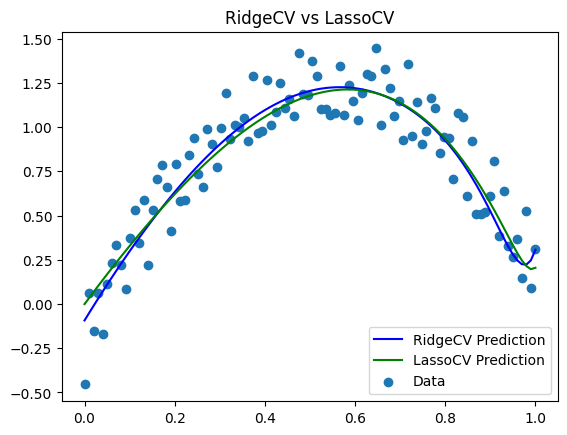

In [38]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_transpoly = transPoly(np.squeeze(X_plot),50)

y_pred_ridge = ridge_model.predict(X_transpoly)
y_pred_lasso = lasso_model.predict(X_transpoly)

plt.plot(X_plot, y_pred_ridge, label="RidgeCV Prediction", color='blue')
plt.plot(X_plot, y_pred_lasso, label="LassoCV Prediction", color='green')
plt.scatter(X, y, label='Data')
plt.title("RidgeCV vs LassoCV")
plt.legend()

plt.show()

## Reflection

Please reflect on the following:
- Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?
### Ans. Ridge and Lasso model gives almost similar Eout however the Lasso model users a much smaller value for the best alpha. The weights also differ w.r.t both the models. Lasso tends to be performing a little better in terms of not overfitting as the data points end.
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

###Ans. Some of the weights obtained in LAsso are zero, which suggets regularization can lead the coefficients to zero when the regularization strength is sufficiently high. Ridge regression does not set coefficients to zero, meaning it does not perform feature selection but rather shrinks the coefficients for all predictors.